# PDSeI - Redes Neuronales convolucionales

# Integrantes:

1. Luis Enrique Muñoz Vega

2. Carlos Marcelo Querevalú Vasquez

3. Arturo Estefano Alvarez Sanchez


Base de datos: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

# Conexión con kaggle

# Instalaciones previas

In [1]:
!pip install -q kaggle
!pip install -q scikeras

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

files.upload()

Saving token.jpg to token.jpg


{'token.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x03\x1f\x03i\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x

# Descargar la base de datos

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 86% 54.0M/62.6M [00:00<00:00, 192MB/s]
100% 62.6M/62.6M [00:00<00:00, 160MB/s]
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# Lectura de datos

In [4]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [5]:
print(train_df.keys())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [6]:
# Elementos por clase

class_counts = train_df['label'].value_counts()
print(class_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


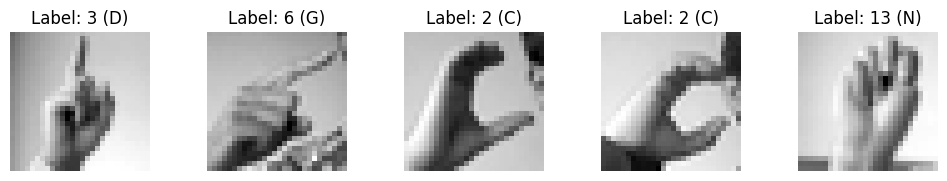

In [7]:
import matplotlib.pyplot as plt

label_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

def plot_images(data, labels, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    fig.tight_layout()

    for i in range(num):
        ax = axes[i]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]} ({label_mapping[labels[i]]})')
        ax.axis('off')

    plt.show()

plot_images(train_df.iloc[:, 1:].values, train_df['label'].values)

# Transformación de datos

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

batch_size = 32

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_val = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_val = test_df['label'].values

# Data Augmentation

In [9]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = datagen_train.flow(
    X_train,
    y_train,
    batch_size=batch_size)

datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=batch_size)



```
1. ¿Qué es el data augmentation y cómo puede beneficiar el entrenamiento de una CNN?

El data augmentation genera variaciones de las imágenes originales (rotación, cambio de tamaño, etc.) para aumentar la cantidad de datos, mejorando la generalización de la CNN y reduciendo el sobreajuste.

2. ¿Por qué es importante normalizar los datos de entrada y qué impacto tiene en el rendimiento del modelo?

La normalización escala los datos, ayudando a que la red aprenda más rápido y mejor, reduciendo la probabilidad de desbordamiento numérico y mejorando la precisión.

```



# Creación del modelo

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,954 (519.35 KB)

 Trainable params: 132,954 (519.35 KB)

 Non-trainable params: 0 (0.00 B)



```
1. ¿Qué función cumplen las capas Conv2D y MaxPooling2D en una CNN?

Conv2D extrae características de la imagen (bordes, texturas), mientras que MaxPooling2D reduce la dimensionalidad, conservando las características importantes y reduciendo el costo computacional.

2. ¿Qué es el Dropout y cómo ayuda a prevenir el sobreajuste en redes neuronales?
    
El Dropout desactiva aleatoriamente neuronas durante el entrenamiento, ayudando a la red a generalizar mejor y reduciendo el sobreajuste.

3. ¿Por qué se utiliza la función de activación ReLU en las capas ocultas y cuáles son sus ventajas?

ReLU introduce no linealidad y es eficiente computacionalmente, lo que permite que la red aprenda patrones complejos sin problemas de gradiente.

4. ¿Qué hace la función de activación softmax en la capa de salida y en qué tipo de problemas se utiliza comúnmente?

Softmax convierte las salidas en probabilidades, ayudando en problemas de clasificación multiclase al elegir la clase con la probabilidad más alta.

5. ¿Qué es el tamaño del filtro (filter size) en una capa convolucional y cómo impacta la calidad de las características extraídas?

El tamaño del filtro define la escala de las características extraídas; tamaños grandes capturan patrones más generales, mientras que tamaños pequeños capturan detalles finos

6. ¿Qué efecto tiene un stride mayor que 1 en la resolución de la salida de una capa convolucional?

Un stride mayor reduce la resolución de la salida, lo que disminuye el costo computacional y puede perder detalles finos en los datos.

7. ¿Cómo se debe seleccionar el tamaño del filtro y el stride para optimizar el balance entre la extracción de características y la complejidad del modelo?

Se elige un tamaño de filtro pequeño para detalles y un stride adecuado para evitar pérdida de información, manteniendo bajo el costo computacional.

```



# Terminación anticipada y Checkpoints

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

In [12]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        if current_val_accuracy and current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            print(f" Modelo guardado época {epoch + 1} con exactitud: {current_val_accuracy:.4f}")

        super().on_epoch_end(epoch, logs)

custom_model_checkpoint = CustomModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')



```
1. ¿Qué es el EarlyStopping y cómo contribuye a mejorar el proceso de entrenamiento de un modelo?

EarlyStopping detiene el entrenamiento cuando el rendimiento en validación no mejora, evitando el sobreajuste y ahorrando tiempo.

2. ¿Cuál es la función de ModelCheckpoint y por qué es útil guardar el mejor modelo durante el entrenamiento?

ModelCheckpoint guarda el mejor modelo basado en la métrica de validación, lo que asegura que se retiene el mejor rendimiento alcanzado.
```



# Entrenamiento

In [13]:
epochs = 5

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping, custom_model_checkpoint]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1262 - loss: 2.8937 Modelo guardado época 1 con exactitud: 0.5706
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.1271 - loss: 2.8896 - val_accuracy: 0.5706 - val_loss: 1.3486
Epoch 2/5
850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4739 - loss: 1.5448 Modelo guardado época 2 con exactitud: 0.7146
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4744 - loss: 1.5432 - val_accuracy: 0.7146 - val_loss: 0.7773
Epoch 3/5
851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6392 - loss: 1.0336 Modelo guardado época 3 con exactitud: 0.8344
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.6395 - loss: 1.0330 - val_accuracy: 0.8344 - val_loss: 0.4958
Epoch 4/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7146 - loss: 0.8125 Modelo guardado época 4 con exactitud: 0.8702
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7146 - loss: 0.8124 - val_accuracy: 0.8702 - val_loss: 0.3699
Epoch 



```
1. ¿Qué significa el parámetro epochs y cómo afecta al entrenamiento de un modelo?

Epochs es el número de veces que el modelo entrena en el conjunto de datos; más epochs pueden mejorar el aprendizaje, pero también causar sobreajuste.

2. ¿Cuál es la diferencia entre train_generator y val_generator en el contexto del entrenamiento y la validación del modelo?

train_generator genera datos para entrenamiento, y val_generator genera datos para validación, ayudando a evaluar el modelo sin sobreajuste.

```



# Predicciones

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


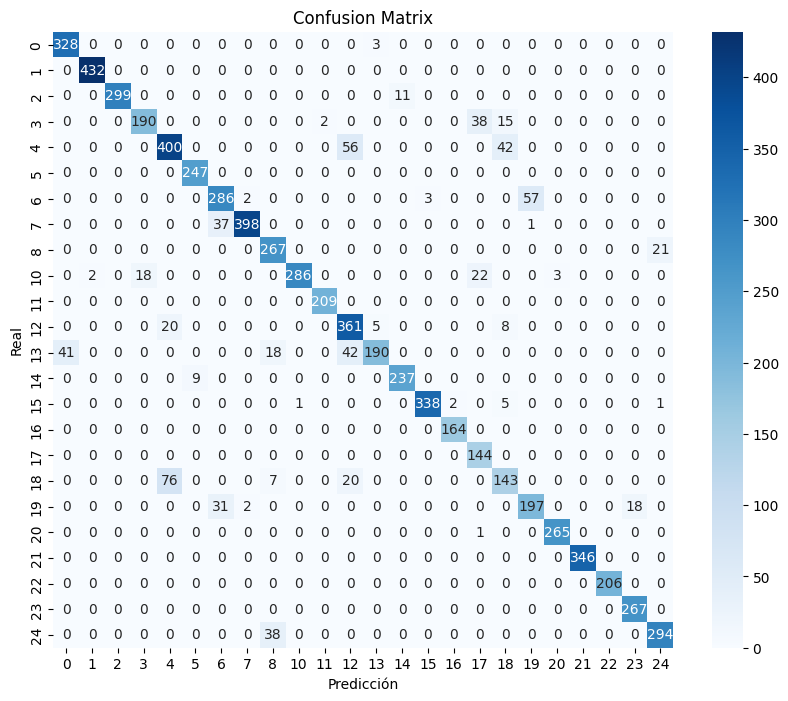

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       331
           1       1.00      1.00      1.00       432
          10       1.00      0.96      0.98       310
          11       0.91      0.78      0.84       245
          12       0.81      0.80      0.80       498
          13       0.96      1.00      0.98       247
          14       0.81      0.82      0.81       348
          15       0.99      0.91      0.95       436
          16       0.81      0.93      0.86       288
          17       1.00      0.86      0.93       331
          18       0.99      1.00      1.00       209
          19       0.75      0.92      0.83       394
           2       0.96      0.65      0.78       291
          20       0.96      0.96      0.96       246
          21       0.99      0.97      0.98       347
          22       0.99      1.00      0.99       164
          23       0.70      1.00      0.83       144
          24       0.67    

In [14]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

best_model = load_model('best_model.keras')

X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=np.unique(y_test.astype(str))))

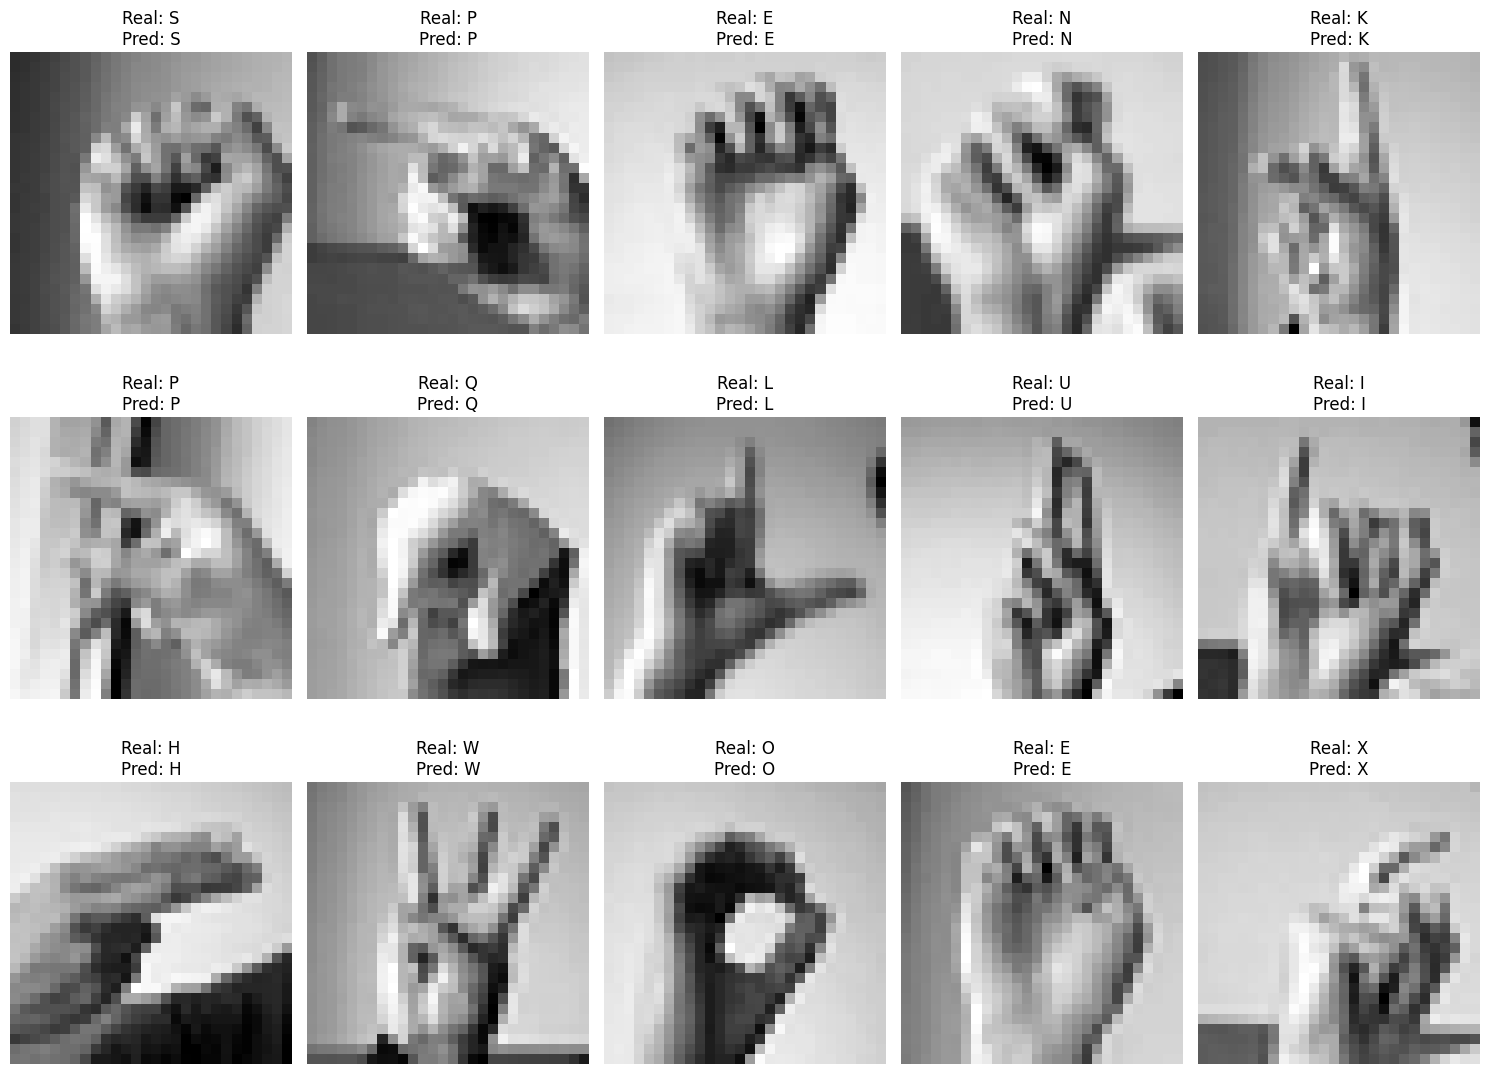

In [15]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 15
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_test[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



```
1. ¿Qué es el confusion_matrix y qué información proporciona sobre el rendimiento del modelo?

La confusion_matrix muestra las predicciones correctas e incorrectas por clase, dando una visión clara de dónde el modelo falla.

2. ¿Cómo se interpreta el classification_report y qué métricas se incluyen en él?

El classification_report incluye métricas como precisión, recall y F1, evaluando la calidad del modelo en cada clase.

3. ¿Por qué es importante utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo?

El conjunto de prueba proporciona una evaluación real del rendimiento del modelo en datos no vistos, validando su capacidad de generalización.

4. ¿Qué rol juega la función np.argmax en el proceso de obtención de clases predichas?

np.argmax selecciona la clase con la mayor probabilidad en las predicciones, convirtiendo salidas de probabilidades en etiquetas de clase.

5. ¿Qué información visual adicional proporciona un mapa de calor (heatmap) de la matriz de confusión?

El heatmap visualiza la matriz de confusión, facilitando la identificación de patrones de error y áreas de mejora en el modelo.
```



# Refinamiento

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', **kwargs):
    dropout_rate = kwargs.get('dropout_rate', 0.5)
    model = Sequential([
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [17]:
from sklearn.model_selection import GridSearchCV

epochs = 1
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

param_grid = {
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.2, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mejor: 0.8730291411589904 usando {'model__dropout_rate': 0.2, 'model__optimizer': 'Adam'}


In [18]:
val_accuracy = grid_result.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.8480200780814278




```
1. ¿Qué es GridSearchCV y cómo se utiliza para optimizar el rendimiento de un modelo?

GridSearchCV prueba combinaciones de hiperparámetros, seleccionando la mejor configuración para optimizar el modelo.

2. ¿Qué representan los parámetros en param_grid y por qué es importante ajustar el optimizador y la tasa de dropout?

param_grid define opciones de hiperparámetros como optimizador y dropout, ajustándolos para mejorar precisión y evitar sobreajuste.

3. ¿Qué significa el parámetro cv=3 en el contexto de la validación cruzada y cómo influye en la evaluación del modelo?

cv=3 divide los datos en 3 particiones para validación cruzada, proporcionando una evaluación más robusta del modelo.
```

